
### Обработку признаков датасета Titanic (https://www.kaggle.com/c/titanic).
 Использовать как категориальные, так и числовые признаки. Построить модель kNN и Байесовские модели. Определить оптимальные параметры моделей. 
По возможности сделать Submit в соревнование на Kaggle.



## Работа с категориальными признаками на примере датасета Titanic

In [ ]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [ ]:
print("Train Shape:",train.shape)
print("Test Shape:",test.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Label encoder Pandas

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
embarked_mapping = {'S':0,'C':1,'Q':2}

train['Embarked_map'] = train['Embarked'].map(embarked_mapping)

In [ ]:
train['Embarked_map'].value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked_map, dtype: int64

#### Label encoder Scikit-learn

In [ ]:
train['Embarked'].drop_duplicates()

0       S
1       C
5       Q
61    nan
Name: Embarked, dtype: object

In [ ]:
def function(x):
    return str(x)
train['Embarked'] = train['Embarked'].apply(lambda x: str(x))

In [ ]:
train['Embarked'].drop_duplicates()

0       S
1       C
5       Q
61    nan
Name: Embarked, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(train.Embarked.drop_duplicates())

dicts['Embarked'] = list(label.classes_)

train['Embarked_encoder'] = label.transform(train['Embarked']) # train['Embarked'] = train.Embarked

In [ ]:
arr = ['Embarked_map', 'Embarked_encoder']
train[arr]

,Embarked_map,Embarked_encoder
0,0.0,2
1,1.0,0
2,0.0,2
3,0.0,2
4,0.0,2
5,2.0,1
6,0.0,2
7,0.0,2
8,0.0,2
9,1.0,0


#### One-hot encoding

In [ ]:
Embarked_dummies = pd.get_dummies(train["Embarked"], prefix="xxxx", dummy_na=False)
#dummy_na - Add a column to indicate NaNs, if False NaNs are ignored.

In [ ]:
Embarked_dummies.head()

,xxxx_C,xxxx_Q,xxxx_S,xxxx_nan
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
train = pd.concat([train, Embarked_dummies], axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_map,Embarked_encoder,xxxx_C,xxxx_Q,xxxx_S,xxxx_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,2,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,2,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,2,0,0,1,0


#### Выделить признаки определенного типа

In [ ]:
list(train.select_dtypes(include=['object']).columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

## Метрики бинарной классификации

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, precision_score, auc, roc_auc_score
import matplotlib.pyplot as plt
y_true = np.array([1,0,1,1,0,0,0,1,0,1])
y_pred = np.array([0,0,1,1,1,0,0,0,1,1])

def value_of_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))  
    print('F1: ', f1_score(y_true, y_pred))
    print('Roc_AUC: ', roc_auc_score(y_true, y_pred))
    
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('My DataSet')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Accuracy:  0.6
Recall:  0.6
Precision:  0.6
F1:  0.6
Roc_AUC:  0.6


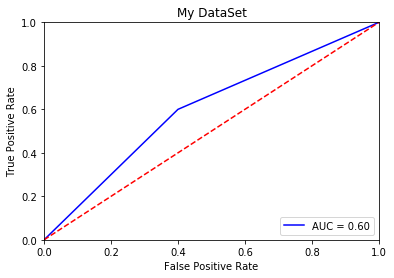

In [ ]:
value_of_metrics(y_true, y_pred)

### ROC-AUC

In [ ]:
roc_auc_score(y_true, y_pred)

0.6

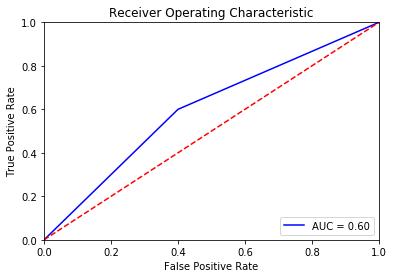

In [ ]:

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_true = np.array([0, 0, 1, 1])
y_pred = np.array([0.1, 0.4, 0.35, 0.8])

In [ ]:
roc_auc_score(y_true, y_pred)

0.75